# Regression

## Importing Dataset

In [1]:
import turicreate as tc

sales = tc.SFrame('home_data.sframe')
sales

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900.0,3.0,1.0,1180.0,5650.0,1.0,0
6414100192,2014-12-09 00:00:00+00:00,538000.0,3.0,2.25,2570.0,7242.0,2.0,0
5631500400,2015-02-25 00:00:00+00:00,180000.0,2.0,1.0,770.0,10000.0,1.0,0
2487200875,2014-12-09 00:00:00+00:00,604000.0,4.0,3.0,1960.0,5000.0,1.0,0
1954400510,2015-02-18 00:00:00+00:00,510000.0,3.0,2.0,1680.0,8080.0,1.0,0
7237550310,2014-05-12 00:00:00+00:00,1225000.0,4.0,4.5,5420.0,101930.0,1.0,0
1321400060,2014-06-27 00:00:00+00:00,257500.0,3.0,2.25,1715.0,6819.0,2.0,0
2008000270,2015-01-15 00:00:00+00:00,291850.0,3.0,1.5,1060.0,9711.0,1.0,0
2414600126,2015-04-15 00:00:00+00:00,229500.0,3.0,1.0,1780.0,7470.0,1.0,0
3793500160,2015-03-12 00:00:00+00:00,323000.0,3.0,2.5,1890.0,6560.0,2.0,0


## Visualizing Graph

In [2]:
tc.show(sales[1:5000]['sqft_living'],sales[1:5000]['price'],'Sqft_living','Price')

Materializing X axis SArray

Materializing Y axis SArray

# Regression on sqft_living and price

In [3]:
train_data,test_data = sales.random_split(0.8,seed=67) # splitting data

## Reg. model

In [4]:
# params - (training_data,target='feature_to_predict',features=[list_of_features_used_to_pridect_data])
# chooses algorithm automatically (Newton's Method)

sqft_model = tc.linear_regression.create(train_data,target='price',features=['sqft_living'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16354

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 1.008128     | 4381122.174521     | 1303712.169829       | 259493.918311                   | 230748.729707                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

## Testing Model

In [5]:
print("Mean of test data : {0}".format(test_data['price'].mean()))

Mean of test data : 544707.215552524


In [6]:
sqft_model.evaluate(test_data) #RSME - root mean square error

{'max_error': 4303989.138540348, 'rmse': 274037.96184147237}

# Model Parameters (Weights)

In [7]:
sqft_model.coefficients

name,index,value,stderr
(intercept),None,-40536.06329566729,5027.759860807901
sqft_living,None,278.7895343381792,2.212725431923046


In [8]:
sqft_model

Class                          : LinearRegression

Schema
------
Number of coefficients         : 2
Number of examples             : 16354
Number of feature columns      : 1
Number of unpacked features    : 1

Hyperparameters
---------------
L1 penalty                     : 0.0
L2 penalty                     : 0.01

Training Summary
----------------
Solver                         : newton
Solver iterations              : 1
Solver status                  : SUCCESS: Optimal solution found.
Training time (sec)            : 1.0151

Settings
--------
Residual sum of squares        : 1101230829398872.9
Training RMSE                  : 259493.9183

Highest Positive Coefficients
-----------------------------
sqft_living                    : 278.7895

Lowest Negative Coefficients
----------------------------
(intercept)                    : -40536.0633

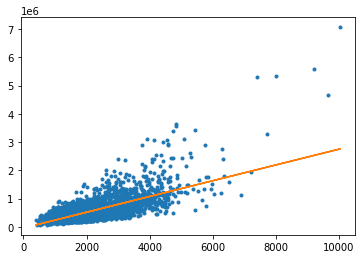

In [9]:
#plotting original data and regression model

import matplotlib.pyplot as plt

plt.plot(test_data['sqft_living'],test_data['price'],'.',
         test_data['sqft_living'],sqft_model.predict(test_data),'-')

## Addition Features

In [10]:
my_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']

sqft2_model = tc.linear_regression.create(train_data,target='price',features=my_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16354

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 75

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.060334     | 4186915.790060     | 1429710.691367       | 182990.079819                   | 188553.383609                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [11]:
print (sqft2_model.evaluate(test_data))
print (sqft_model.evaluate(test_data))

{'max_error': 3848609.85184812, 'rmse': 203206.42399534505}
{'max_error': 4303989.138540348, 'rmse': 274037.96184147237}


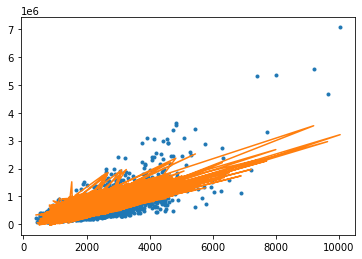

In [12]:
plt.plot(test_data['sqft_living'],test_data['price'],'.',test_data['sqft_living'],sqft2_model.predict(test_data),'-')

In [13]:
sqft2_model.coefficients

name,index,value,stderr
(intercept),None,-16816.10813152595,14060.87197867932
bedrooms,None,-41849.306833955576,1926.2567899542018
bathrooms,None,17192.53386027394,3159.3570984775056
sqft_living,None,264.6655903785325,2.7032148562040983
sqft_lot,None,0.28135930827011346,0.03895023557136365
floors,None,-17742.97121359361,3250.487941491163
zipcode,98136,236167.3601494849,18292.42319231409
zipcode,98074,137224.52963439963,16382.342261248308
zipcode,98053,117643.29484593202,16884.704202945315
zipcode,98003,-73167.52069714411,17936.538633975215


# Predicting Price of Houses

In [14]:
h1 = sales[sales['id']=='5309101200']
h1

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+----------+----------+-----------+
|     id     |            date           |  price   | bedrooms | bathrooms |
+------------+---------------------------+----------+----------+-----------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000.0 |   4.0    |    2.25   |
+------------+---------------------------+----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    2400.0   |  5350.0  |  1.5   |     0      |  0   |     4     |  7.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   1460.0   |     940.0     |  1929.0  |     0.0      |  98117  | 47.67632376 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.37010126 |     1250.0    | ... |
+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

<img src='house_images/house2.jpg'>

In [15]:
h1['price']

dtype: float
Rows: ?
[620000.0, ... ]

In [16]:
sqft_model.predict(h1)

dtype: float
Rows: 1
[628558.8191159627]

In [17]:
sqft2_model.predict(h1)

dtype: float
Rows: 1
[731992.1125907166]

## House 2 (fancy)

In [18]:
h2 = sales[sales['id']=='1925069082']
h2

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+-----------+----------+-----------+
|     id     |            date           |   price   | bedrooms | bathrooms |
+------------+---------------------------+-----------+----------+-----------+
| 1925069082 | 2015-05-11 00:00:00+00:00 | 2200000.0 |   5.0    |    4.25   |
+------------+---------------------------+-----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    4640.0   | 22703.0  |  2.0   |     1      |  4   |     5     |  8.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   2860.0   |     1780.0    |  1952.0  |     0.0      |  98052  | 47.63925783 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.09722322 |     3140.0    | ... |
+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [19]:
print ("Actual Price : \t{0}".format(h2['price']))
print ("Model 1 : \t{0}".format(sqft_model.predict(h2)))
print ("Model 2 : \t{0}".format(sqft2_model.predict(h2)))

Actual Price : 	[2200000.0, ... ]
Model 1 : 	[1253047.376033484]
Model 2 : 	[1219388.7226964098]


## House 3 (super fancy)

<img src='house_images/bill_gates.png'>

In [20]:
h3 = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]
     }

print ("Model 1 : \t{0}".format(sqft_model.predict(tc.SFrame(h3))))
print ("Model 2 : \t{0}".format(sqft2_model.predict(tc.SFrame(h3))))

Model 1 : 	[13898940.653613292]
Model 2 : 	[14554710.699243566]
